In [277]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(sys.version)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [278]:
# read in data and get first look
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
# Is there any missing data?

for col in train.columns :
    print(col, ":", str(train[col].isnull().sum()))


PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


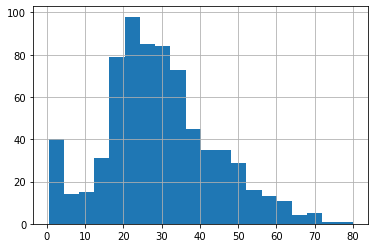

In [280]:
# correct missing data for age.
# first do discovery on age
# split out by gender

train['Age'].hist(bins = 20)

In [281]:
# Slight difference in age
# Is there difference with title ? 
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [282]:
# logic for title. First, test code

import re

print(train['Name'][0])

re.findall(r"(?<=, )[\w]*", train['Name'][0])[0]

Braund, Mr. Owen Harris


'Mr'

In [283]:
# Next create the loopo
aa = []
for name in train.Name :
    aa.append(re.findall(r"(?<=, )[\w]*",name)[0])

train['Name'] = aa
    

In [284]:
aa[0:4]

['Mr', 'Mrs', 'Miss', 'Mrs']

In [285]:
# do cleaning with title (now Name)

train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Mme           1
Lady          1
the           1
Sir           1
Capt          1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [286]:
# let's do a survival rate by title

pd.DataFrame(train.groupby('Name')['Survived'].mean()).reset_index()

,Name,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [287]:
# combine all of the lady titles and Sir that were 100 %

train['Name'] = np.where(train['Name'].isin(['Mlle','Mme','Ms','the']), 'Lady', train['Name'])

In [288]:
# same thing with high value men's names

train['Name'] = np.where(train['Name'].isin(['Master', 'Dr', 'Major', 'Sir']), 'Master', train['Name'])

In [289]:
# Rare names with Men

train['Name'] = np.where(train['Name'].isin(['Rev', 'Col','Jonkheer', 'Capt', 'Don']), 'Mr', train['Name'])

In [290]:
# New Naming Convention

pd.DataFrame(train.groupby('Name')['Survived'].mean()).reset_index()

,Name,Survived
0,Lady,1.000000
1,Master,0.560000
2,Miss,0.697802
3,Mr,0.155303
4,Mrs,0.792000


In [291]:
# New names average age

pd.DataFrame(train.groupby('Name')['Age'].mean()).reset_index()

,Name,Age
0,Lady,30.166667
1,Master,12.503778
2,Miss,21.773973
3,Mr,32.776284
4,Mrs,35.898148


In [292]:
# Fill in Average Age with Title

for index, row in train.iterrows() :
    if np.isnan(row['Age']) :
        train['Age'][index] = train[train['Name'] == train['Name'][index]]['Age'].mean()
    else:
        pass

In [293]:
train[pd.isnull(train['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [294]:
# complete Embarked with Mode

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [295]:
# Check again for missing data

for col in train.columns :
    print(col, ":", str(train[col].isnull().sum()))

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 0


In [296]:
# Get rid of any meaningless columns 
del[train['Cabin'], train['PassengerId'], train['Ticket']]

In [297]:
# final check for missing data

for col in train.columns :
    print(col, ":", str(train[col].isnull().sum()))

Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0


In [298]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [299]:
# make sex binary 

train['Sex_Male'] = np.where(train['Sex'] == 'male', 1, 0)

In [300]:
# Create dummies for Embarked

dummies = pd.get_dummies(train['Embarked'], prefix = 'Embarked')

train = pd.concat([train,dummies], axis = 1)

In [301]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,Mr,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,Mrs,female,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,Miss,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,Mrs,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,Mr,male,35.0,0,0,8.0500,S,1,0,0,1


In [302]:
# create isAlone featuer

train['Alone'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

In [303]:
# Whoa if you were alone you are much more likely to survive!~!!

train.groupby('Alone')['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [304]:
# Dummy Name

name_dummy = pd.get_dummies(train['Name'], prefix = 'Title')

train = pd.concat([train,name_dummy], axis = 1)

In [305]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Male,Embarked_C,Embarked_Q,Embarked_S,Alone,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,Mr,male,22.0,1,0,7.2500,S,1,0,0,1,0,0,0,0,1,0
1,1,1,Mrs,female,38.0,1,0,71.2833,C,0,1,0,0,0,0,0,0,0,1
2,1,3,Miss,female,26.0,0,0,7.9250,S,0,0,0,1,1,0,0,1,0,0
3,1,1,Mrs,female,35.0,1,0,53.1000,S,0,0,0,1,0,0,0,0,0,1
4,0,3,Mr,male,35.0,0,0,8.0500,S,1,0,0,1,1,0,0,0,1,0


In [306]:
# Now that data is cleaned, let's do some EDA
# Step One: Look at Gender

In [307]:
#Sex has huge role in survival rate

train.groupby('Sex_Male')['Survived'].mean()

Sex_Male
0    0.742038
1    0.188908
Name: Survived, dtype: float64

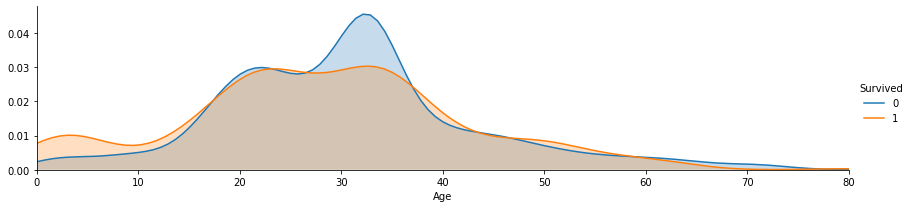

In [308]:
#Next let's look at age
# First as a continuous variable.

#plot distributions of age of passengers who survived or did not survive

# Looks like Children were more likely to survive. People around 30 to 40 not as lucky

a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

In [309]:
# Next, lets bin age

from sklearn.preprocessing import LabelEncoder

train['Agebin'] = pd.qcut(train['Age'].astype(int), 5)
label = LabelEncoder()
train['agecode'] = label.fit_transform(train['Agebin'])

In [310]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Male,...,Embarked_Q,Embarked_S,Alone,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Agebin,agecode
0,0,3,Mr,male,22.0,1,0,7.2500,S,1,...,0,1,0,0,0,0,1,0,"(20.0, 26.0]",1
1,1,1,Mrs,female,38.0,1,0,71.2833,C,0,...,0,0,0,0,0,0,0,1,"(32.0, 38.0]",3
2,1,3,Miss,female,26.0,0,0,7.9250,S,0,...,0,1,1,0,0,1,0,0,"(20.0, 26.0]",1
3,1,1,Mrs,female,35.0,1,0,53.1000,S,0,...,0,1,0,0,0,0,0,1,"(32.0, 38.0]",3
4,0,3,Mr,male,35.0,0,0,8.0500,S,1,...,0,1,1,0,0,0,1,0,"(32.0, 38.0]",3


Text(0.5, 1.0, 'Age bins by Survial Rate')

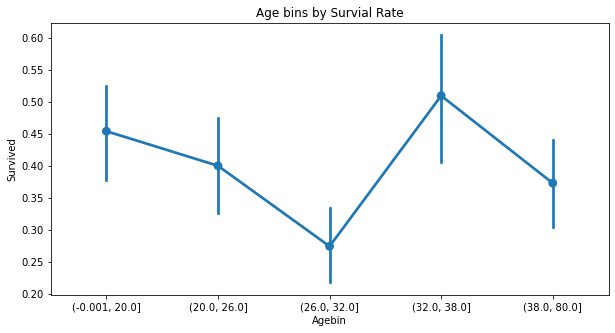

In [311]:
# plot of Agebin by Survived
# looks like the 20 to 26 year olds are the unlucky ones.

plt.figure(figsize = (10,5))
sns.pointplot(x ='Agebin', y = 'Survived', data = train)
plt.title("Age bins by Survial Rate")

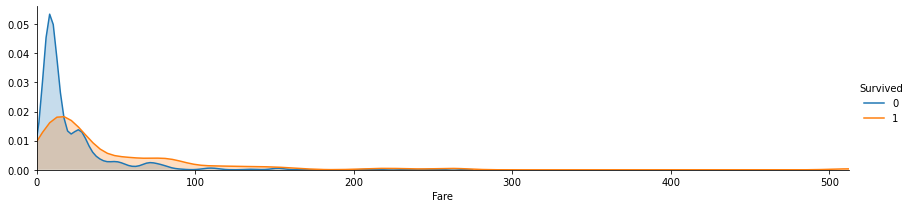

In [312]:
# Do some analysis with Fare to Survival Rate
# this feature is very right tailed...
# lets try to bin

a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Fare', shade= True )
a.set(xlim=(0 , train['Fare'].max()))
a.add_legend()

In [313]:
train['Farebin'] = pd.qcut(train['Fare'].astype(int), 5)
label = LabelEncoder()
train['farecode'] = label.fit_transform(train['Farebin'])

Text(0.5, 1.0, 'Fare bins by Survial Rate')

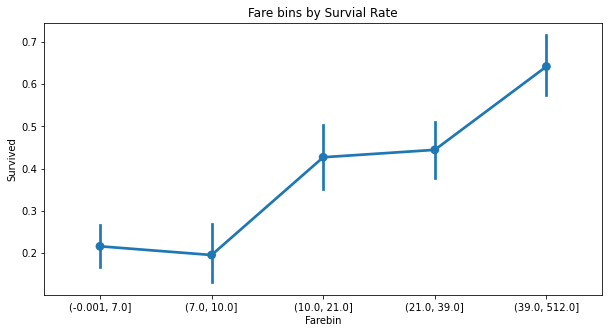

In [314]:
#Nice Linear pattern when we break down in to bins!

plt.figure(figsize = (10,5))
sns.pointplot(x ='Farebin', y = 'Survived', data = train)
plt.title("Fare bins by Survial Rate")

In [315]:
# Next, let's do pclass

train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

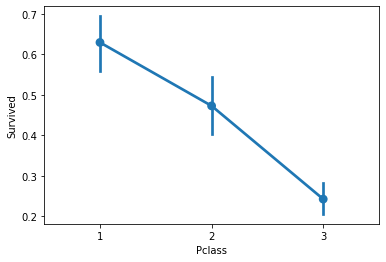

In [316]:
# DANG there is a huge difference between pclass and survived

sns.pointplot(x = 'Pclass', y = 'Survived', data = train)

Text(0.5, 1.0, 'Survival Rate by Pclass and Gender')

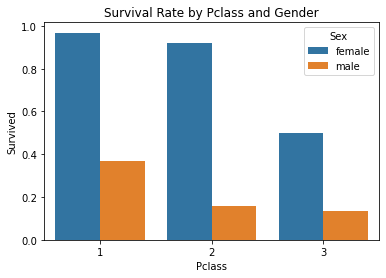

In [317]:
# Let's mix pclass with Gender
# First and second class women almost completely Survived!
# Big dropoff in third class.

pclass_gender = pd.DataFrame(train.groupby(['Pclass','Sex'])['Survived'].mean()).reset_index()

sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = pclass_gender)
plt.title('Survival Rate by Pclass and Gender')